In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import string
import matplotlib.pyplot as plt

# Preprocessing
Let's perform some basic preprocessing to get rid of punctuation and make everything lowercase. We'll then split the lyrics up by line and tokenize the lyrics.

In [2]:
#Creating a Function for tokenizer
def tokenizer(sentences, num_word = -1):
    # Fit a Tokenizer on the corpus
    if num_word > -1:
        tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_word)
    else:
        tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer

def create_lyrical_corpus(dataset, column):
    dataset[column] = dataset[column].str.replace('[{}]'.format(string.punctuation),'')
    #making it lowerCase
    dataset[column] = dataset[column].str.lower()
    #making a one long string
    lyrics = dataset[column].str.cat()
    corpus = lyrics.split('\n')
    #Removing White Spaces
    for w in range(len(corpus)):
        corpus[w] = corpus[w].rstrip()
    # Remove any empty lines
    corpus = [l for l in corpus if l != '']
    return corpus

In [3]:
#Getting the data
dataset = pd.read_csv('songdata.csv', dtype=str)[:10]
dataset.head()
#Here We make a function above to process our data easily

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
# Create the corpus using the 'text' column containing lyrics
corpus = create_lyrical_corpus(dataset, 'text')

#Tokenizing the corpus
tokenizer = tokenizer(corpus)

total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

<ipython-input-2-8a766163dfca>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[column] = dataset[column].str.replace('[{}]'.format(string.punctuation),'')


{'you': 1, 'i': 2, 'and': 3, 'a': 4, 'me': 5, 'the': 6, 'is': 7, 'my': 8, 'to': 9, 'ma': 10, 'it': 11, 'of': 12, 'im': 13, 'your': 14, 'love': 15, 'so': 16, 'as': 17, 'that': 18, 'in': 19, 'andante': 20, 'boomaboomerang': 21, 'make': 22, 'on': 23, 'oh': 24, 'for': 25, 'but': 26, 'new': 27, 'bang': 28, 'its': 29, 'be': 30, 'like': 31, 'know': 32, 'now': 33, 'how': 34, 'could': 35, 'youre': 36, 'sing': 37, 'never': 38, 'no': 39, 'chiquitita': 40, 'can': 41, 'we': 42, 'song': 43, 'had': 44, 'good': 45, 'youll': 46, 'she': 47, 'just': 48, 'girl': 49, 'again': 50, 'will': 51, 'take': 52, 'please': 53, 'let': 54, 'am': 55, 'eyes': 56, 'was': 57, 'always': 58, 'cassandra': 59, 'blue': 60, 'time': 61, 'dont': 62, 'were': 63, 'return': 64, 'once': 65, 'then': 66, 'sorry': 67, 'cryin': 68, 'over': 69, 'feel': 70, 'ever': 71, 'believe': 72, 'what': 73, 'do': 74, 'go': 75, 'all': 76, 'out': 77, 'think': 78, 'every': 79, 'leave': 80, 'look': 81, 'at': 82, 'way': 83, 'one': 84, 'music': 85, 'down': 

# Create Sequences and Labels
After preprocessing, we next need to create sequences and labels. Creating the sequences themselves is similar to before with texts_to_sequences, but also including the use of N-Grams; creating the labels will now utilize those sequences as well as utilize one-hot encoding over all potential output words.

In [5]:
#tokenizing the sentences to sequences
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        sequences.append(n_gram_seq)
        
#padding the sequences
maxlen = max([len(seq) for seq in sequences])
print(maxlen)
padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
padded_seq_array = np.array(padded_sequence)

#Splitting the Senetnces b/w input and output word predicted
input_seq, labels = padded_seq_array[:,:-1], padded_seq_array[:,-1]

#Encoding the Labels 
encoded_label = tf.keras.utils.to_categorical(labels,num_classes=total_words)
print(encoded_label)

20
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [6]:
#Checking out how our data is been stored
#The tokenizer has just a single word per index
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])

#Input Sequences will have multiple indexes
print(input_seq[5], labels[5])
print(encoded_label[5])

32
97
[  0   0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29
   4] 287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

# Train a Text Generation Model
Building an RNN to train our text generation model will be very similar to the sentiment models you've built previously. The only real change necessary is to make sure to use Categorical instead of Binary Cross Entropy as the loss function - we could use Binary before since the sentiment was only 0 or 1, but now there are hundreds of categories.

From there, we should also consider using more epochs than before, as text generation can take a little longer to converge than sentiment analysis, and we aren't working with all that much data yet. I'll set it at 200 epochs here since we're only use part of the dataset, and training will tail off quite a bit over that many epochs.

In [7]:
#Building the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 64, input_length = maxlen-1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
model.add(tf.keras.layers.Dense(total_words, activation = 'softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

In [8]:
#Fitting the mode
history  = model.fit(input_seq, encoded_label, epochs = 200, verbose=1)

Epoch 1/200


C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\backend.py:4846: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


62/62 [==============================] - 5s 12ms/step - loss: 6.0059 - accuracy: 0.0368
Epoch 2/200
62/62 [==============================] - 1s 12ms/step - loss: 5.4315 - accuracy: 0.0424
Epoch 3/200
62/62 [==============================] - 1s 12ms/step - loss: 5.3474 - accuracy: 0.0439
Epoch 4/200
62/62 [==============================] - 1s 12ms/step - loss: 5.2890 - accuracy: 0.0469
Epoch 5/200
62/62 [==============================] - 1s 12ms/step - loss: 5.2154 - accuracy: 0.0530
Epoch 6/200
62/62 [==============================] - 1s 12ms/step - loss: 5.1356 - accuracy: 0.0530
Epoch 7/200
62/62 [==============================] - 1s 13ms/step - loss: 5.0624 - accuracy: 0.0550
Epoch 8/200
62/62 [==============================] - 1s 12ms/step - loss: 4.9838 - accuracy: 0.0610
Epoch 9/200
62/62 [==============================] - 1s 13ms/step - loss: 4.9078 - accuracy: 0.0772
Epoch 10/200
62/62 [==============================] - 1s 14ms/step - loss: 4.8206 - accuracy: 0.0757
Epoch 11/20

62/62 [==============================] - 1s 12ms/step - loss: 1.3453 - accuracy: 0.7230
Epoch 82/200
62/62 [==============================] - 1s 12ms/step - loss: 1.3095 - accuracy: 0.7311
Epoch 83/200
62/62 [==============================] - 1s 12ms/step - loss: 1.2946 - accuracy: 0.7386
Epoch 84/200
62/62 [==============================] - 1s 12ms/step - loss: 1.2638 - accuracy: 0.7447
Epoch 85/200
62/62 [==============================] - 1s 12ms/step - loss: 1.2510 - accuracy: 0.7427
Epoch 86/200
62/62 [==============================] - 1s 12ms/step - loss: 1.2208 - accuracy: 0.7513
Epoch 87/200
62/62 [==============================] - 1s 12ms/step - loss: 1.2159 - accuracy: 0.7558
Epoch 88/200
62/62 [==============================] - 1s 12ms/step - loss: 1.1957 - accuracy: 0.7563
Epoch 89/200
62/62 [==============================] - 1s 13ms/step - loss: 1.1650 - accuracy: 0.7639
Epoch 90/200
62/62 [==============================] - 1s 13ms/step - loss: 1.1445 - accuracy: 0.7684
Epo

62/62 [==============================] - 1s 12ms/step - loss: 0.5054 - accuracy: 0.8789
Epoch 162/200
62/62 [==============================] - 1s 12ms/step - loss: 0.4956 - accuracy: 0.8860
Epoch 163/200
62/62 [==============================] - 1s 13ms/step - loss: 0.4909 - accuracy: 0.8829
Epoch 164/200
62/62 [==============================] - 1s 13ms/step - loss: 0.4973 - accuracy: 0.8840
Epoch 165/200
62/62 [==============================] - 1s 13ms/step - loss: 0.4952 - accuracy: 0.8819
Epoch 166/200
62/62 [==============================] - 1s 13ms/step - loss: 0.4945 - accuracy: 0.8799
Epoch 167/200
62/62 [==============================] - 1s 13ms/step - loss: 0.4887 - accuracy: 0.8829
Epoch 168/200
62/62 [==============================] - 1s 13ms/step - loss: 0.4815 - accuracy: 0.8804
Epoch 169/200
62/62 [==============================] - 1s 13ms/step - loss: 0.4921 - accuracy: 0.8794
Epoch 170/200
62/62 [==============================] - 1s 13ms/step - loss: 0.4763 - accuracy: 0

In [9]:
columns = history.history
print(columns.keys())
print(columns['loss'])

dict_keys(['loss', 'accuracy'])
[6.00592565536499, 5.431546211242676, 5.347366809844971, 5.289025783538818, 5.21537446975708, 5.135605335235596, 5.062378883361816, 4.983809471130371, 4.907795429229736, 4.820634365081787, 4.725269794464111, 4.623023509979248, 4.518833160400391, 4.416851043701172, 4.304625034332275, 4.204214096069336, 4.104437351226807, 4.021244525909424, 3.922865867614746, 3.8381872177124023, 3.7723588943481445, 3.67305326461792, 3.599090576171875, 3.5211102962493896, 3.4512553215026855, 3.3774161338806152, 3.3263473510742188, 3.266148328781128, 3.2030069828033447, 3.141676902770996, 3.081087589263916, 3.013144016265869, 2.947737216949463, 2.8980541229248047, 2.8372321128845215, 2.79183030128479, 2.7524752616882324, 2.681703805923462, 2.6219918727874756, 2.597459077835083, 2.5427680015563965, 2.574738025665283, 2.561309814453125, 2.467752456665039, 2.4046614170074463, 2.3555989265441895, 2.3091461658477783, 2.2633132934570312, 2.2135024070739746, 2.1740026473999023, 2.1

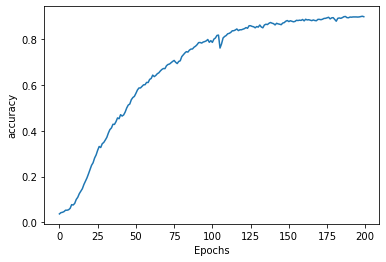

In [10]:
def plot_graph(columns, string):
    plt.plot(columns[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
plot_graph(columns, 'accuracy')

# Generate new lyrics!
It's finally time to generate some new lyrics from the trained model, and see what we get. To do so, we'll provide some "seed text", or an input sequence for the model to start with. We'll also decide just how long of an output sequence we want - this could essentially be infinite, as the input plus the previous output will be continuously fed in for a new output word (at least up to our max sequence length).

In [12]:
new_text = 'I love You'
next_words = 100
for i in range(next_words):
    token_list = tokenizer.texts_to_sequences([new_text])[0]
    token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=maxlen-1)
    predicted = np.argmax(model.predict(token_list), axis=-1)
    out_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            out_word = word
            break
    new_text = new_text + ', ' + out_word
print(new_text)

I love You, make, me, sing, make, me, mad, make, good, and, would, would, would, would, would, would, chiquitita, happy, care, chiquitita, making, andante, do, have, alone, stood, at, sailing, tumbling, down, good, as, new, anywhere, anywhere, would, ride, shoulder, good, care, life, love, do, do, do, only, sing, more, making, me, strong, good, care, new, but, good, care, new, care, care, care, do, been, evening, evening, eye, evening, evening, eye, eye, evening, eye, evening, eye, evening, eye, evening, eye, evening, eye, eye, evening, eye, evening, eye, evening, evening, eye, evening, eye, evening, eye, evening, evening, eye, evening, eye, evening, eye, evening, eye
